## Q - finder

-----------

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import math as math
import pprint as pp
%matplotlib inline

In [13]:
def subplotter(a,b,c,xlab,ylab,title,x,y):
    plt.subplot(a,b,c)
    plt.grid()
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.scatter(x,y)
    return


In [14]:
def allplotter(df):
    plt.figure(1)
    plt.figure(figsize=(12, 12))
    subplotter(2,2,1,xlab ='z',ylab = 'E',title = 'z vs E',x = df['z'],y = df['E'])
    subplotter(2,2,2,xlab ='r',ylab = 'E',title = 'r vs E',x = df['r'],y = df['E'])
    subplotter(2,2,3,xlab ='r',ylab = 'z',title = 'r vs z',x = df['r'],y = df['z'])
    subplotter(2,2,4,xlab ='r',ylab = 'ang',title = 'r vs ang',x = df['r'],y = df['ang'])
    plt.show()
    return

In [36]:
def Qfinder(df,nangles,verbose,plotter): 
    
    df.columns = ['r','z','E']
    df['z'] = df['z'].apply(lambda x: 1.00-x)
    df['r_by_z'] = (df['r']/(df['z']))
    df['ang'] = df['r_by_z'].apply(lambda x: math.atan(x)*(180/math.pi))
    
    if plotter: 
        allplotter(df)
    
    if verbose: 
        print "shape of file = ", df.shape



    ntheta = np.linspace(-90,90,nangles+1) 
    if verbose: 
        print"===============================================================================" 
        print "ntheta = ", ntheta
    
    
    
    E_mean = []
    for k in range(nangles):
        df1 = df[(df['ang'] >  ntheta[k])]
        df1 = df1[(df1['ang'] < ntheta[k+1])]
        df1 = df1.dropna(subset=['ang'])
        E_mean.append(df1['E'].mean())
        
    if verbose:     
        print"==============================================================================="        
        print "E_mean = "
        pp.pprint(E_mean)




    Q = 0.0
    for k in range(nangles):
        Q = Q + 2.0*math.pi*(20e-9)**2*(80)*8.85e-12*E_mean[k]*\
                (math.cos((ntheta[k+1]/180)*math.pi) - math.cos((ntheta[k]/180)*math.pi))
            
    if verbose:         
        print"==============================================================================="
        print "Q found = ",Q


    return Q

In [37]:
def Runner(data_file,nangles):
    df1 = pd.read_csv(data_file)
    
    print "======================","RESULT OF", data_file,"===================================="
        
    Q1 = Qfinder(df1,nangles,verbose = True,plotter=True)

--------------

---------

### Work bench

----------

------

#### Please enter the file names

In [45]:
ls -l

total 5608
-rw-r--r--@ 1 dibakarsigdel  staff    22392 Sep 23 18:45 Dt-100nm below.csv
-rw-r--r--@ 1 dibakarsigdel  staff    23165 Sep 23 18:46 Dt-150nm below.csv
-rw-r--r--@ 1 dibakarsigdel  staff    23618 Sep 23 18:47 Dt-200nm below.csv
-rw-r--r--@ 1 dibakarsigdel  staff    21676 Sep 23 18:43 Dt-20nm below.csv
-rw-r--r--@ 1 dibakarsigdel  staff    21787 Sep 23 18:44 Dt-40nm below.csv
-rw-r--r--@ 1 dibakarsigdel  staff    28059 Sep 23 18:47 Dt-500nm below.csv
-rw-r--r--@ 1 dibakarsigdel  staff    22150 Sep 23 18:44 Dt-60nm below.csv
-rw-r--r--@ 1 dibakarsigdel  staff    28059 Sep 22 12:15 Dt-800nm below.csv
-rw-r--r--@ 1 dibakarsigdel  staff  2336917 Sep 23 14:42 Plotter-I.ipynb
-rw-r--r--@ 1 dibakarsigdel  staff    86483 Sep 23 18:28 Qfinder.ipynb
-rw-r--r--@ 1 dibakarsigdel  staff    28048 Sep 22 12:21 center.csv
-rw-r--r--@ 1 dibakarsigdel  staff   205286 Sep 23 18:16 electric_field.ipynb


In [47]:
file1 = 'center.csv'
file2 = 'Dt-20nm below.csv'
file3 = 'Dt-40nm below.csv'
file4 = 'Dt-60nm below.csv'
file5 = 'Dt-100nm below.csv'
file6 = 'Dt-150nm below.csv'
file7 = 'Dt-200nm below.csv'
file8 = 'Dt-500nm below.csv'
file9 = 'Dt-800nm below.csv'

#### Please enter the angle division no

In [51]:
nangles = 10

--------

### Run

====================== RESULT OF Dt-20nm below.csv ====================================


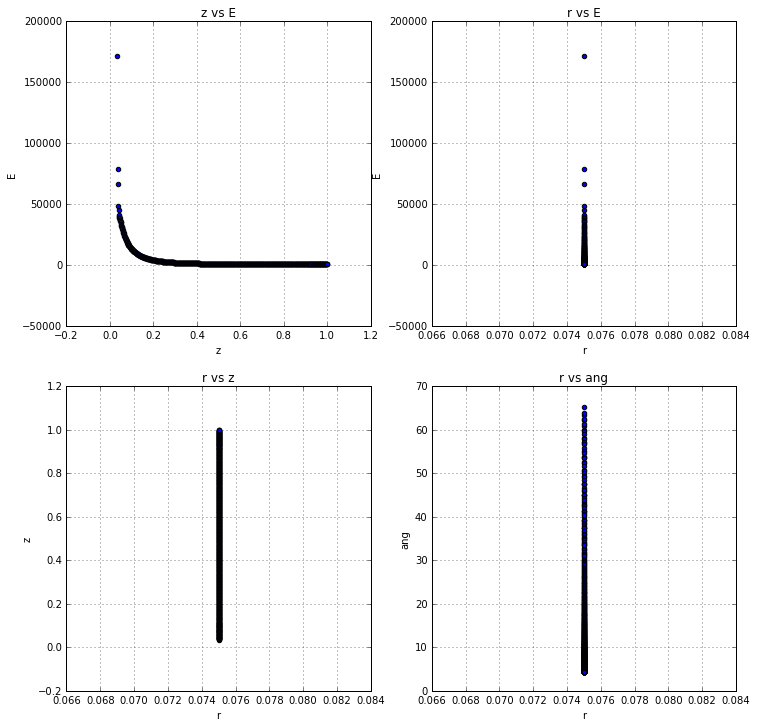

shape of file =  (728, 5)
ntheta =  [-90. -72. -54. -36. -18.   0.  18.  36.  54.  72.  90.]
E_mean = 
[nan,
 nan,
 nan,
 nan,
 nan,
 774.9944975848862,
 6208.613197452633,
 19747.82578,
 49129.21604,
 nan]
Q found =  nan


In [56]:
Runner(file2,nangles)
#Runner(file1,nangles)